# Final Project: Used Car Purchases
Module 3 | Chapter 4 | Notebook 1

Over the previous chapters and modules, you learned a great deal of data science methods. After you performed a regression on data with relatively few features in the test project, you can now focus on classification in the final project. You'll receive a data set containing used car purchases and unbalanced target categories.

***
By the end of this exercise you will have done the following:
* Imported and cleaned the data
* Carried out feature engineering
* Fitted the model to the data
* Combined the individual steps into to a data pipeline
* interpreted your model.
***


In this exercise you will only receive a few hints and should work as independently as possible.

At the end of this project, you will generate classifications for data points that only StackFuel knows the target values for. The data is located in the file *features_aim.csv*. So you will have to repeat most of the steps. The easiest way to do this is to package all relevant work steps (such as data cleaning, feature engineering and making predictions) into functions. At the end, you'll call these functions in the correct order and apply them to the target dataset *features_aim.csv*.


**Scenario**: You work as a data scientist for a US used car dealer. The dealer buys used cars at low prices in online auctions and from other car dealers in order to resell them profitably on their own platform. It's not always easy to tell whether it is worth buying a used car: One of the biggest challenges in used car auctions is the risk of a car having problems that are so serious, that they prevent it from being resold to customers. These are referred to as "lemons" - cars that have significant defects from the outset due to production faults that significantly affect the safety, use or value of that car and at the same time cannot be repaired with a reasonable number of repairs or within a certain period of time. In cases like this, the customer has the right to be refunded the purchase price. In addition to the purchase costs, the bad purchase of these so-called lemons leads to considerable costs as a result, such as the storage and repair of the car, which can result in market losses when the vehicle is resold.

That is why it is important for your boss to rule out as many bad purchases as possible. To help the buyers in the company with the large number of cars on offer, you are to develop a model that predicts whether a car would be a bad buy, a so-called lemon. However, this must not lead to too many good purchases being excluded. You won't receive more detailed information on the costs and profits of the respective purchases for developing the prototype just yet.


Each row of the dataset corresponds to a car that was first auctioned and then resold. The data dictionary looks like this:

Column number | Column name | Type | Description
:---|:---|:---|:----  
1 | `'IsBadBuy'` | categorical (nominal) | Identifies whether the auctioned car is a "lemon", and therefore whether it was a bad buy (`0`= not a lemon, `1`= lemon)
2  |  `'PurchDate'` | continuous (`datetime`) | The date the vehicle was purchased at the auction
3 | `'Auction'` | categorical (nominal) | auction provider the vehicle was purchased from
4  |  `'VehYear'` | continuous (`int`) | Vehicle's year model 
5  |  `'VehicleAge'` | continuous (`int`) | The age of the car at the time of the auction
6  |  `'Make'` | categorical (nominal) | Car manufacturer
7  |  `'Model'` | categorical (nominal) | Car model
8  |  `'Trim'` | categorical (nominal) | Vehicle trim
9  |  `'SubModel'` | categorical (nominal) | Car submodel
10  |  `'Color'` | categorical (nominal) | Vehicle color
11  |  `'Tranmission'` | categorical (nominal) | Vehicle transmission type (automatic, manual)
12  |  `'WheelTypeID'` | categorical (nominal) | The type ID of the wheel rims 
13  |  `'WheelType'` | categorical (nominal) | The type of wheel rims
14  |  `'VehOdo'` | continuous (`int`) | Vehicle mileage
15  |  `'Nationality'` | categorical (nominal) | Manufacturer's country
16  |  `'Size'` | categorical (nominal) | The size class of the vehicle (compact, SUV, etc.)
17 | `'TopThreeAmericanName'` | categorical (nominal) | indicates whether the manufacturer is one of the three leading American car manufacturers.
18  |  `'MMRAcquisitionAuctionAveragePrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle in average condition at the time of purchase
19  |  `'MMRAcquisitionAuctionCleanPrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle in above average condition at the time of purchase
20  |  `'MMRAcquisitionRetailAveragePrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle at retail in average condition at the time of purchase
21  |  `'MMRAcquisitonRetailCleanPrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle at retail in above-average condition at the time of purchase
22  |  `'MMRCurrentAuctionAveragePrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle in average condition
23  |  `'MMRCurrentAuctionCleanPrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle in above-average condition
24  |  `'MMRCurrentRetailAveragePrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle at retail in average condition
25  |  `'MMRCurrentRetailCleanPrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle at retail in above-average condition
26  |  `'PRIMEUNIT'` | categorical (nominal) | Indicates whether the vehicle would have a higher demand than a standard purchase 
27  |  `'AUCGUART'` | categorical (nominal) | The guarantee level given for the vehicle by the auction platform (`'GREEN'` - guarantee  present, `'YELLOW'` - guarantee unclear, `'RED'` - no guarantee)
28 | `'BYRNO'` | categorical (nominal) | Unique number assigned to the buyer who bought the vehicle
29  |  `'VNZIP1'` | categorical (nominal) | Zip code where the vehicle was purchased
30  |  `'VNST'` | categorical (nominal) |  State of the vehicle when it was purchased 
31 | `'VehBCost'` | continuous (`int`) | Purchase costs in US dollars paid for the vehicle at the time of purchase
32  |  `'IsOnlineSale'` | categorical (nominal) |  Indicates whether the vehicle was originally purchased online.
33 | `'WarrantyCost'` | continuous (`int`) | Cost of the warranty for a term of 36 months

**Tip**: This data dictionary is also located in the file *Data_dictionary.ipynb*. You can open this in a separate window with your file browser.


The following headings and texts should give you a rough guideline. You can always add more code cells or change your approach if you want to.

You'll follow the steps of the *Stackfuel Way* here again. You can find the PDF in *The Data Science Workflow* (Module 3 Chapter 3)


## Preparation


A data science model always has the purpose of solving a certain problem. So it's best to briefly review the task and consider the context of your model.
* What problem should the model solve?
* What is the nature of the problem (e.g. classification, regression, clustering...)
* What would an application using your model look like?
Which requirements has your employer specified for your model?
* What data do you need so that you can build your model?


### Define metric


Based on your understanding of the problem at hand, you should now consider which metric(s) are best suited to assess the success of your model.


**Recall** ("That is why it is important for your boss to rule out as many bad purchases as possible").

**Precision** ("However, this must not lead to too many good purchases being excluded.")

### Gather data


The data is stored in the file *data_train.csv*. The target vector is given by the column `'IsBadBuy'`. 
Import the modules you typically need for importing and exploring the data. Then import the data.


In [10]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.float_format', '{:.2f}'.format) #Sets display option to 2 decimal places

In [2]:
# read data
df = pd.read_csv('data_train.csv')
df.head()

def reset_all():
    import pandas as pd
    df = pd.read_csv('data_train.csv')
    df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')
    return df

## EDA


### Understand the data


Familiarize yourself with the data at the beginning so that you know what to look out for later when you clean and prepare the data.

**Tip**: The `'PurchDate'` column is indicated as a Unix timestamp in whole seconds. To convert this column with into a date format `pandas`, you can use the following code: `my_df.loc[:, 'PurchDate'] = pd.to_datetime(my_df.loc[:, 'PurchDate'], unit='s')`.


In [3]:
df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')

In [4]:
df.dtypes

IsBadBuy                                      int64
PurchDate                            datetime64[ns]
Auction                                      object
VehYear                                       int64
VehicleAge                                    int64
Make                                         object
Model                                        object
Trim                                         object
SubModel                                     object
Color                                        object
Transmission                                 object
WheelTypeID                                 float64
WheelType                                    object
VehOdo                                        int64
Nationality                                  object
Size                                         object
TopThreeAmericanName                         object
MMRAcquisitionAuctionAveragePrice           float64
MMRAcquisitionAuctionCleanPrice             float64
MMRAcquisiti

In [5]:
#Check 8-value summary of the data
df.describe()

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,65620.00,65620.00,65620.00,62747.00,65620.00,65602.00,65602.00,65602.00,65602.00,65330.00,65330.00,65330.00,65330.00,65620.00,65620.00,65564.00,65620.00,65620.00
mean,0.12,2005.35,4.18,1.49,71505.93,6127.14,7371.16,8498.24,9851.61,6131.69,7389.95,8776.87,10145.91,26363.52,58090.45,6727.46,0.03,1277.38
std,0.33,1.73,1.71,0.52,14582.98,2456.97,2716.44,3153.98,3382.36,2430.51,2681.44,3087.01,3305.66,25733.11,26147.50,1759.01,0.16,599.97
min,0.00,2001.00,0.00,0.00,5368.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,835.00,3106.00,1.00,0.00,462.00
25%,0.00,2004.00,3.00,1.00,61844.75,4273.00,5405.00,6279.00,7494.00,4275.00,5412.00,6540.00,7790.25,17212.00,32124.00,5435.00,0.00,837.00
50%,0.00,2005.00,4.00,1.00,73378.50,6094.00,7303.00,8447.00,9792.00,6062.00,7314.00,8736.00,10103.00,19662.00,73129.00,6700.00,0.00,1169.00
75%,0.00,2007.00,5.00,2.00,82440.00,7765.00,9018.75,10658.00,12094.00,7735.00,9012.00,10910.00,12309.00,22808.00,80022.00,7900.00,0.00,1623.00
max,1.00,2010.00,9.00,3.00,115717.00,35722.00,36859.00,39080.00,41482.00,35722.00,36859.00,39080.00,41062.00,99761.00,99224.00,38785.00,1.00,7498.00


In [6]:
#Checl for unique values in the dataset
df.nunique()

IsBadBuy                                 2
PurchDate                              517
Auction                                  3
VehYear                                 10
VehicleAge                              10
Make                                    29
Model                                 1029
Trim                                   134
SubModel                               840
Color                                   16
Transmission                             3
WheelTypeID                              4
WheelType                                3
VehOdo                               37791
Nationality                              4
Size                                    12
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice    10147
MMRAcquisitionAuctionCleanPrice      11112
MMRAcquisitionRetailAveragePrice     12445
MMRAcquisitonRetailCleanPrice        13148
MMRCurrentAuctionAveragePrice        10097
MMRCurrentAuctionCleanPrice          11014
MMRCurrentR

In [7]:
#Check for data grouped by car maker
df_maker_group = df.groupby('Make').mean()

#Calculate number of sales by vehicle
df_maker_group['count'] = df.groupby('Make').count()['IsBadBuy']

#Rearrange columns for easier inspection
cols = ['count'] + [col for col in df_maker_group.columns if col != 'count']
df_maker_group = df_maker_group[cols]

df_maker_group.sort_values(by='IsBadBuy', ascending=False)

,count,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
Make,,,,,,,,,,,,,,,,,,,
MINI,23,0.35,2003.87,5.78,1.04,76753.35,8833.52,10325.57,11792.52,13373.39,8713.30,10153.61,11825.65,13456.52,24094.35,58715.00,8507.17,0.00,2959.96
INFINITI,38,0.34,2003.26,6.24,1.09,71799.21,9039.66,10598.87,11521.05,13249.76,8834.45,10422.55,11698.16,13408.29,20727.00,61191.55,9825.06,0.05,1392.84
LINCOLN,89,0.29,2002.90,6.58,1.11,76625.66,6847.46,8372.75,9128.08,10810.88,6774.33,8302.55,9274.17,10946.73,23223.94,50150.80,7772.98,0.02,1453.49
LEXUS,24,0.29,2002.96,6.46,1.08,69756.58,11874.75,13453.04,14318.75,16276.04,11701.12,13300.58,14754.75,16829.08,17944.46,54909.62,12950.68,0.04,1250.96
ACURA,28,0.25,2003.00,6.46,1.00,81890.29,7217.75,8715.64,9471.50,11071.93,7187.75,8675.32,9472.50,11048.11,22433.64,61588.46,9093.75,0.00,1488.71
OLDSMOBILE,215,0.20,2002.99,6.33,1.46,75839.31,2851.26,3916.13,4259.50,5434.97,2885.24,3943.65,4471.03,5655.37,16730.82,66114.78,4466.77,0.01,2091.92
SUBARU,26,0.19,2005.81,3.77,1.29,78856.96,9121.42,10713.19,11884.19,13527.27,10009.08,11725.44,13314.36,15061.56,18295.27,60479.77,8971.54,0.12,899.15
MERCURY,810,0.17,2004.46,5.04,1.19,76961.56,6060.57,7485.01,8434.75,9921.29,6142.20,7575.03,8780.22,10263.85,19423.18,54572.10,6230.53,0.03,1195.78
BUICK,656,0.16,2003.86,5.66,1.51,76258.26,5550.47,7037.37,7873.22,9459.11,5515.05,6998.46,8067.14,9650.04,19813.83,51391.85,6188.27,0.02,2425.86


In [8]:
#Check distribution of NaN

df.isna().sum()

IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2098
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2873
WheelType                             2877
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          290
MMRCurrentAuctionCleanPrice            290
MMRCurrentR

In [9]:
df.dtypes

IsBadBuy                                      int64
PurchDate                            datetime64[ns]
Auction                                      object
VehYear                                       int64
VehicleAge                                    int64
Make                                         object
Model                                        object
Trim                                         object
SubModel                                     object
Color                                        object
Transmission                                 object
WheelTypeID                                 float64
WheelType                                    object
VehOdo                                        int64
Nationality                                  object
Size                                         object
TopThreeAmericanName                         object
MMRAcquisitionAuctionAveragePrice           float64
MMRAcquisitionAuctionCleanPrice             float64
MMRAcquisiti

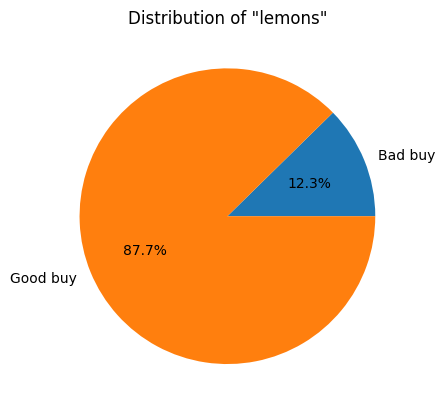

In [8]:
import matplotlib.pyplot as plt

badbuy = (df['IsBadBuy'].sum())/len(df['IsBadBuy'])
goodbuy = 1 - badbuy

plt.style.use('default')
plt.pie([badbuy, goodbuy], labels=['Bad buy', 'Good buy'], autopct='%.1f%%')
plt.title('Distribution of "lemons"');

Note that the training set is heavily unbalanced. Probably some under/oversamplig necessary.

In [11]:
num_cols = [x for x in df.columns if df[x].dtype == 'int64' or df[x].dtype == 'float64']
#ns.pairplot(df[num_cols])
not_num_cols = [x for x in df.columns if df[x].dtype == 'object']

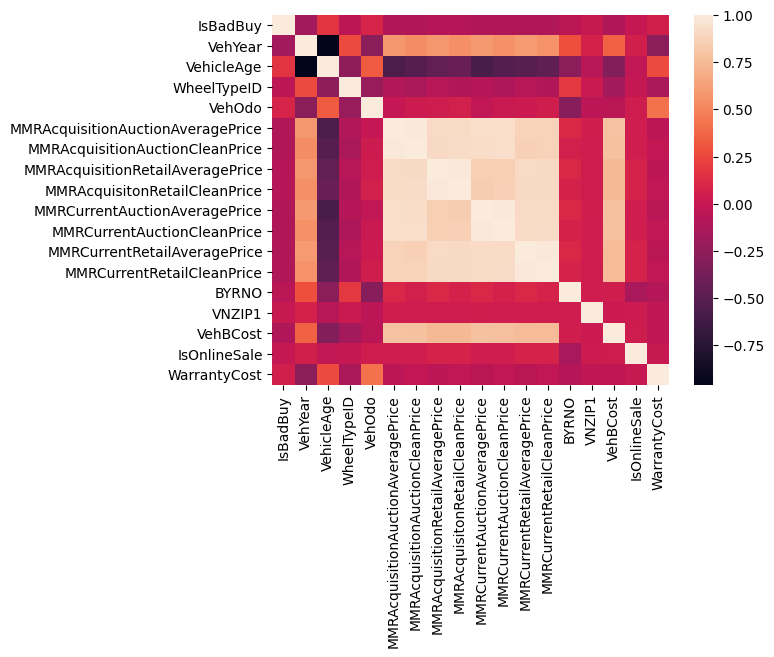

In [12]:
num_corrs = df[num_cols].corr()
sns.heatmap(num_corrs);

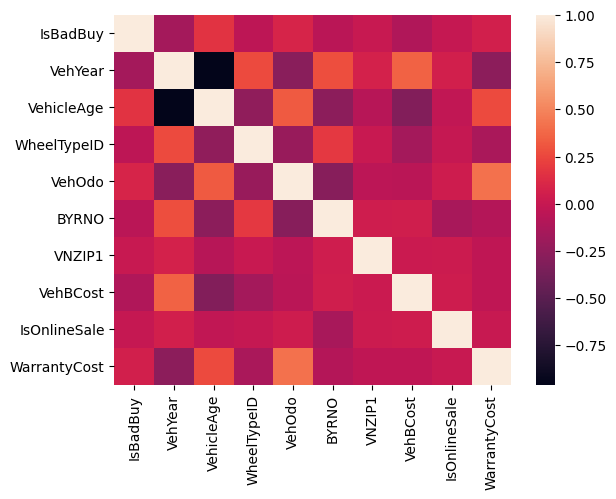

In [13]:
#Correlation excluding MMR columns
not_MMR_cols = [x for x in df.columns if x[:3] != 'MMR']
not_MMR_corr = df[not_MMR_cols].corr()
sns.heatmap(not_MMR_corr);

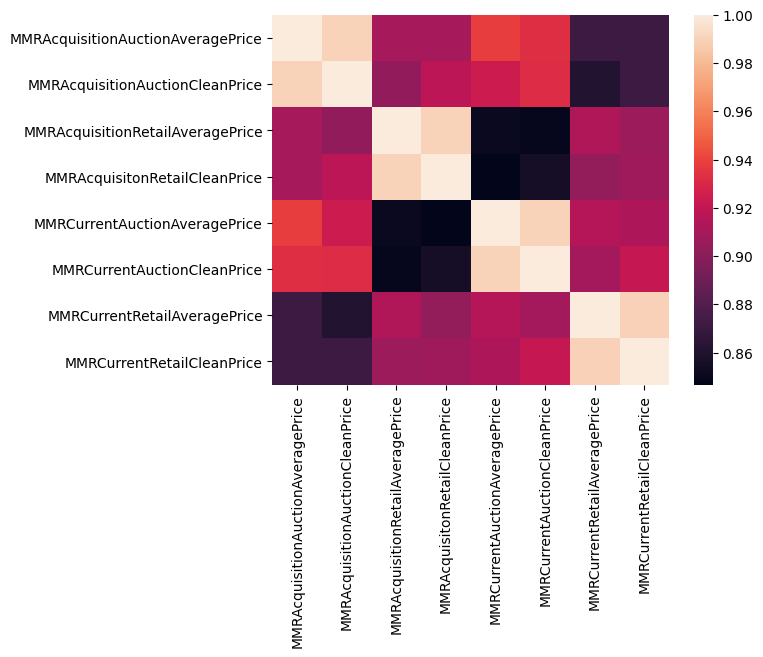

In [14]:
#Correlation between MMR columns
MMR_cols = [x for x in df.columns if x[:3] == 'MMR']
MMR_corr = df[MMR_cols].corr()
sns.heatmap(MMR_corr);

### **Study of meaning of the MMR columns**

1. **MMRAcquisitionAuctionAveragePrice**: This is the average price a vehicle was bought for at an auction, with the vehicle in average condition at the time of purchase. This gives an idea of the general market value of similar vehicles under normal circumstances.

2. **MMRAcquisitionAuctionCleanPrice**: This represents the purchase price at auction for a vehicle in above-average condition. Vehicles in "clean" condition typically show minimal wear and have no significant mechanical or exterior issues, fetching higher prices.

3. **MMRAcquisitionRetailAveragePrice**: This is the average retail purchase price for the vehicle in average condition at the time of purchase. This price is typically higher than the auction price as it reflects the retail market where vehicles are sold directly to consumers.

4. **MMRAcquisitionRetailCleanPrice**: This is the purchase price for the vehicle at retail in above-average condition. This price will be higher than both the average auction and average retail prices, reflecting the premium paid for higher quality or better-maintained vehicles in the retail setting.

5. **MMRCurrentAuctionAveragePrice**: This indicates the current market price for the vehicle in average condition if bought at an auction today. It helps assess the current market dynamics and fluctuating auction prices.

6. **MMRCurrentAuctionCleanPrice**: This is the current price for a vehicle in above-average condition at an auction. It provides insight into what a well-maintained vehicle might fetch in the current market environment.

7. **MMRCurrentRetailAveragePrice**: This shows the current average retail price of the vehicle. Retail prices are generally higher than auction prices and this value represents what one might expect to pay at a dealership.

8. **MMRCurrentRetailCleanPrice**: This is the current retail price for a vehicle in above-average condition. Like the other "clean" prices, it reflects the higher end of the market value for vehicles that are in better than average shape.

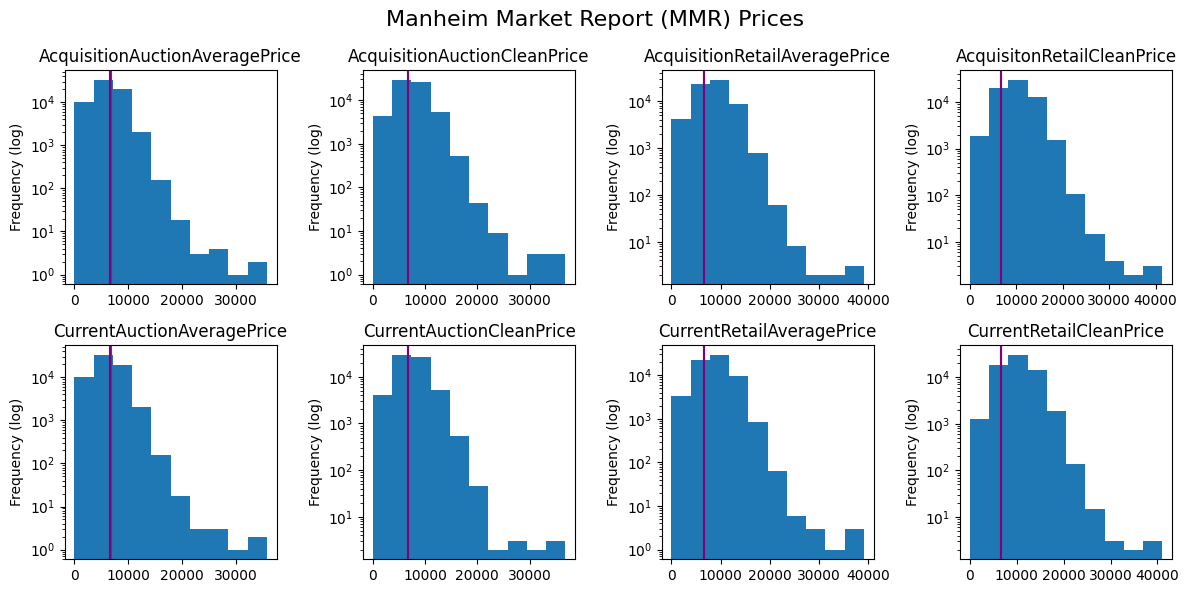

In [15]:
import matplotlib.pyplot as plt

MMR_cols = [x for x in df.columns if x[:3] == 'MMR']

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=[12,6])
axs = axs.flatten()
i = 0
for col in MMR_cols:
    df[col].plot(kind='hist', ax=axs[i], logy=True)
    axs[i].set_title(col[3:])
    axs[i].set_ylabel('Frequency (log)')
    axs[i].axvline(x=df['VehBCost'].mean(), c='red')
    axs[i].axvline(x=df['VehBCost'].median(), c='purple')
    i+=1

plt.suptitle('Manheim Market Report (MMR) Prices', size=16)
plt.tight_layout()



**Differences**:
- **Auction vs. Retail**: Auction prices are typically lower than retail prices as auctions often deal in bulk, have varied vehicle conditions, and primarily serve dealers rather than final consumers.
- **Average vs. Clean**: "Average" condition prices are for typical vehicles with normal wear and use, whereas "clean" prices are for vehicles in exceptionally good condition, reflecting a premium price.
- **Acquisition vs. Current**: "Acquisition" prices refer to past transaction values when the vehicle was initially purchased, useful for historical comparisons. "Current" prices reflect the ongoing market rates, indicating how values have shifted due to various factors like market demand, economic changes, or seasonal influences.

In [16]:
#Analyze the difference of mean/median of prices
means = {}
medians = {}
for col in MMR_cols:
    mean_temp = df[col].mean()
    means[col] = mean_temp
    median_temp = df[col].median()
    medians[col] = median_temp

df_prices = pd.DataFrame([medians, means], index=['median', 'mean'])
df_prices

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
median,6094.00,7303.00,8447.00,9792.00,6062.00,7314.00,8736.00,10103.00
mean,6127.14,7371.16,8498.24,9851.61,6131.69,7389.95,8776.87,10145.91


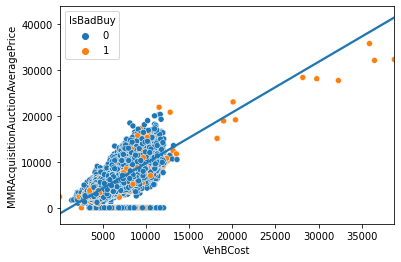

In [11]:
reg_data = df[['VehBCost', 'MMRAcquisitionAuctionAveragePrice', 'IsBadBuy']].dropna()

sns.regplot(x='VehBCost', y='MMRAcquisitionAuctionAveragePrice', data=reg_data, scatter=False)
sns.scatterplot(x='VehBCost', y='MMRAcquisitionAuctionAveragePrice', data=reg_data, hue='IsBadBuy')
plt.show()

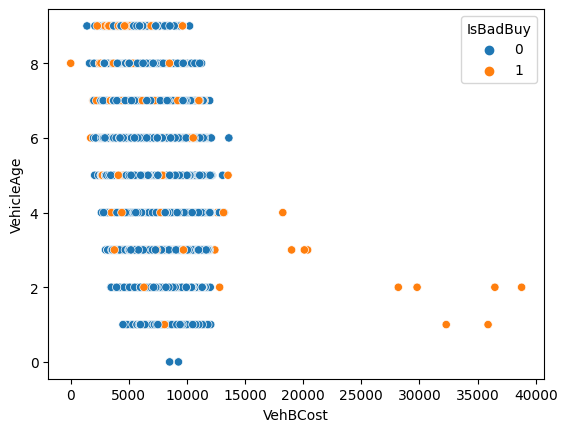

In [19]:
#sns.regplot(x=df['VehBCost'], y=df['VehicleAge'], scatter=False)
sns.scatterplot(x=df['VehBCost'], y=df['VehicleAge'], hue=df['IsBadBuy'])
plt.show()

In [ ]:
#Import if needed to reset data
#import pandas as pd
#df = pd.read_csv('data_train.csv')

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster = DBSCAN(eps=5000, min_samples=500)

cluster_data = df[['VehBCost', 'MMRAcquisitionAuctionAveragePrice']].dropna()

#Using all the data uses too much memory. I used a sample of 20% of the data that looks inside a cluster
cluster_data_high = cluster_data[cluster_data['VehBCost'] > 15000]
cluster_data_red = cluster_data[cluster_data['VehBCost'] < 15000].sample(frac=0.2, random_state=42) 
cluster_data = pd.concat([cluster_data_red, cluster_data_high], ignore_index=True)

#Scale data
cluster_data_scaled =scaler.fit_transform(cluster_data)

#Fit data
cluster.fit(cluster_data)

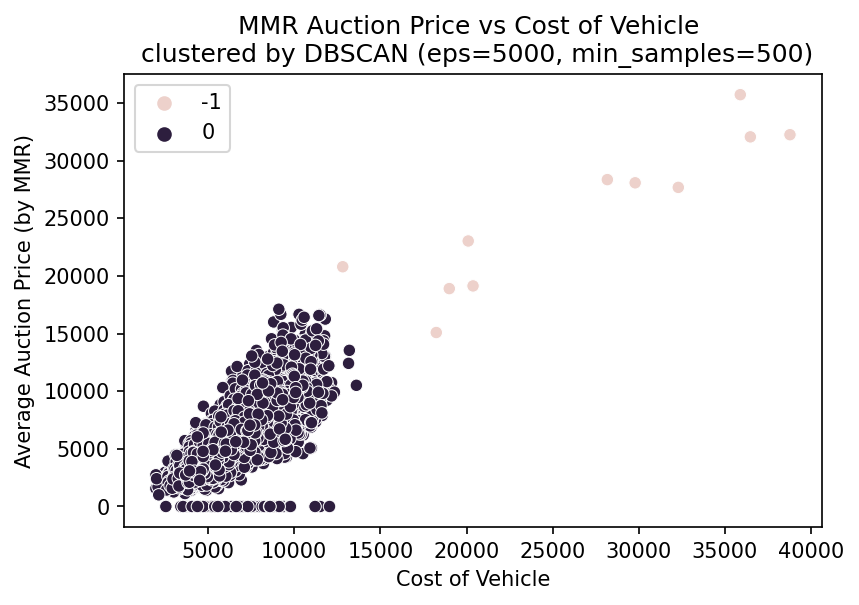

In [16]:
#Plot the clusters

import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(dpi=150)
sns.scatterplot(x='VehBCost', y='MMRAcquisitionAuctionAveragePrice', data=cluster_data, hue=cluster.labels_, ax=ax)
plt.ylabel('Average Auction Price (by MMR)')
plt.xlabel('Cost of Vehicle')
plt.title('MMR Auction Price vs Cost of Vehicle \n clustered by DBSCAN (eps=5000, min_samples=500)');

In [26]:
df.columns

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

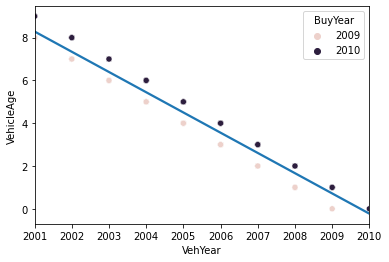

In [32]:
import seaborn as sns

df['BuyYear'] = df['PurchDate'].dt.year
sns.regplot(y='VehicleAge', x='VehYear', data=df, scatter=False)
sns.scatterplot(y='VehicleAge', x='VehYear', hue='BuyYear', data=df);

### **Histogram of buy prices**

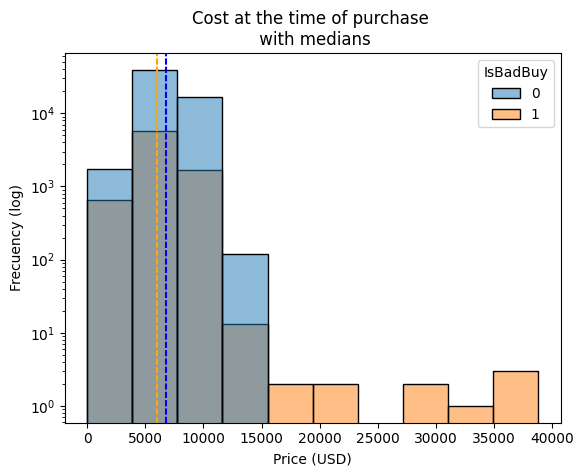

In [21]:
sns.histplot(x='VehBCost', data=df.loc[:,['VehBCost', 'IsBadBuy']],  hue='IsBadBuy', bins=10); #Log scale on the Y axis makes it easier to find outliers
plt.title("Cost at the time of purchase \n with medians")
plt.yscale('log')
plt.ylabel('Frecuency (log)')
plt.xlabel('Price (USD)')
plt.axvline(x=df[df['IsBadBuy'] ==  0]['VehBCost'].median(), c='blue', dashes=[3,1])
plt.axvline(x=df[df['IsBadBuy'] ==  1]['VehBCost'].median(), c='orange', dashes=[3,1]);

In [10]:
len(df[df['VehBCost'] > 15000])

10

Although the dataset is unbalanced, the distribution of buy prices are similar, with the exception of **10** vehicles over 15000 USD, which are all lemons. These could skew the training data.

<AxesSubplot:xlabel='VehicleAge', ylabel='IsBadBuy'>

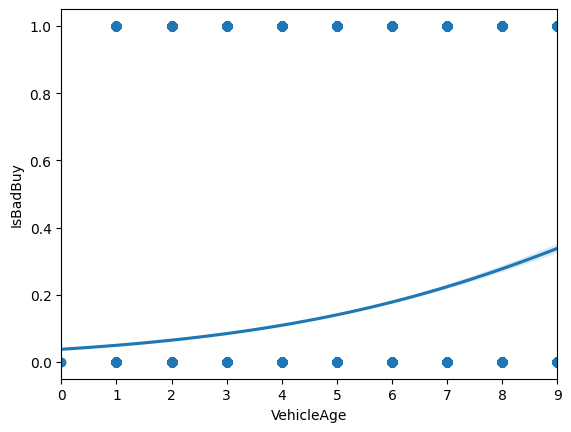

In [20]:
import seaborn as sns
sns.regplot(x='VehicleAge', y='IsBadBuy', data=df, logistic=True)

<AxesSubplot:xlabel='VehBCost', ylabel='IsBadBuy'>

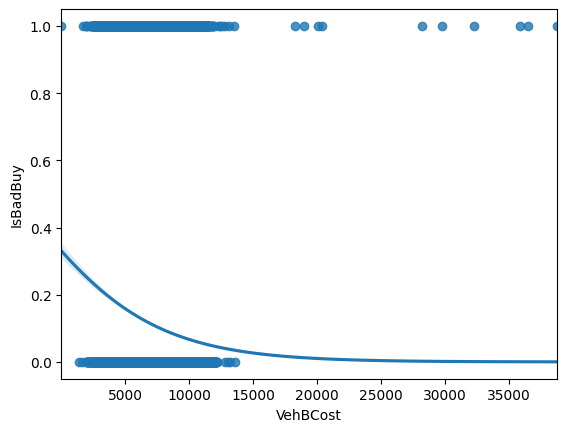

In [32]:
sns.regplot(x='VehBCost', y='IsBadBuy', data=df, logistic=True)

#### Deal with categorical NaNs and replaces with the mode of the corresponding Make

In [22]:
df[not_MMR_cols].isna().sum()

IsBadBuy                    0
PurchDate                   0
Auction                     0
VehYear                     0
VehicleAge                  0
Make                        0
Model                       0
Trim                     2098
SubModel                    7
Color                       7
Transmission                8
WheelTypeID              2873
WheelType                2877
VehOdo                      0
Nationality                 4
Size                        4
TopThreeAmericanName        4
PRIMEUNIT               62534
AUCGUART                62534
BYRNO                       0
VNZIP1                      0
VNST                        0
VehBCost                   56
IsOnlineSale                0
WarrantyCost                0
dtype: int64

In [23]:
#checks the mode of ['Trim', 'WheelTypeID', 'WheelType', 'Size'] by Make, to replace if NaN
def replace_nomcat_mode(df_sample):
    
    """
    Replaces NaN in categorical data ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color'] 
    for the mode of each by Make
    Replaces NaN in SubModel with Model
    Args: DataFrame with columns ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color']
    Returns: Returns df with replaced values
    """
    mode_function = lambda x: x.mode()[0] if not x.mode().empty else 'Bas' 
    cat_cols_nan = ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color']

    trim_replace = df.groupby('Make')['Trim'].apply(mode_function).to_dict()
    wheelTypeID_replace = df.groupby('Make')['WheelTypeID'].apply(mode_function).to_dict()
    wheelType_replace = df.groupby('Make')['WheelType'].apply(mode_function).to_dict()
    size_replace = df.groupby('Make')['Size'].apply(mode_function).to_dict()
    color_replace = df.groupby('Make')['Color'].apply(mode_function).to_dict()
    
    df_replace = pd.DataFrame([trim_replace, wheelTypeID_replace, wheelType_replace, size_replace, color_replace], index=cat_cols_nan).T
    
    for row in df_sample.index:
        for col in cat_cols_nan:
            if pd.isna(df_sample.loc[row, col]):
                df_sample.at[row,col] = df_replace.loc[df_sample.loc[row, 'Make'], col]

        if pd.isna(df_sample.loc[row, 'SubModel']):
            df_sample.at[row, 'SubModel'] = df_sample.loc[row, 'Model']
    return df_sample

In [24]:
df = replace_nomcat_mode(df)

In [25]:
#Extract Body type from submodel
def classify_body_type(submodel):
    import re
    patterns = {
        'Sedan': 'SEDAN|STRATUS',
        'Coupe': 'COUPE',
        'SUV': 'SUV|SPORT UTILITY|UTILITY|XUV|CUV|CROSSOVER|JEEP|FREESTAR|HARDTOP',
        'Minivan': 'MINIVAN|MAZDA5',
        'Wagon': 'WAGON',
        'Hatchback': 'HATCHBACK|LIFTBACK|HATCKBACK',
        'Pickup': 'CAB|PICKUP',
        'Passenger': 'PASSENGER',
        'Van': 'VAN',
        'Sport':'SPORT|CONVERTIBLE|SPYDER|ROADSTER'
    }
    for key, pattern in patterns.items():
        if re.search(pattern, submodel, re.IGNORECASE):
            return key
    return 'Other'

df['BodyType'] = df['SubModel'].apply(classify_body_type)


In [26]:
df[not_MMR_cols+['BodyType']].groupby('BodyType').mean()

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
BodyType,,,,,,,,,,
Coupe,0.16,2004.46,5.07,1.39,71378.26,19303.77,57522.64,5969.63,0.02,1186.26
Hatchback,0.13,2005.70,4.05,1.55,69451.43,21296.72,61844.67,5741.84,0.01,919.55
Minivan,0.12,2005.00,4.44,1.67,75898.13,24101.92,54888.39,6020.06,0.02,1858.92
Other,0.12,2005.38,3.94,1.62,71219.69,37509.12,47059.50,6045.62,0.06,1531.50
Passenger,0.13,2005.00,4.42,1.67,75802.51,30384.22,58145.49,5851.37,0.02,2304.67
Pickup,0.12,2004.44,5.05,1.26,76946.42,20360.19,61540.07,8212.11,0.01,1048.08
SUV,0.14,2004.64,4.85,1.17,75868.97,21292.17,58417.93,7961.34,0.02,1377.43
Sedan,0.12,2005.64,3.90,1.60,69843.96,27467.30,57780.84,6291.48,0.03,1193.80
Sport,0.13,2005.39,4.08,1.33,70365.78,22244.18,55623.08,7687.33,0.02,1321.05


In [8]:
df[df['VehBCost'] == 1]

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
1606,1,1232323200,OTHER,2001,8,DODGE,DAKOTA PICKUP 2WD 4C,Bas,EXT CAB 2.5L,RED,...,3094.0,4215.0,NaN,NaN,99761,85018,AZ,1.0,0,1590


## Work with non numeric columns

In [27]:
num_cols = [x for x in df.columns if df[x].dtype == 'int64' or df[x].dtype == 'float64']
non_num_cols = [x for x in df.columns if df[x].dtype == 'object']

df[df['Nationality'].isna()]

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,BodyType
7909,0,2009-10-19,MANHEIM,2002,7,GMC,SIERRA 1500,SL,BASE,WHITE,...,NaN,NaN,NaN,16044,27542,NC,7500.00,0,1455,Other
18819,0,2009-10-23,MANHEIM,2006,3,HYUNDAI,ELANTRA 2.0L I4 MPI,GLS,4D SEDAN,SILVER,...,NaN,NaN,NaN,20234,89165,NV,5705.00,0,482,Sedan
28888,0,2010-02-17,ADESA,2008,2,JEEP,PATRIOT 2WD 4C,Spo,4D SUV SPORT,SILVER,...,NaN,NaN,NaN,21053,85226,AZ,9655.00,0,825,SUV
34137,0,2010-02-24,ADESA,2008,2,JEEP,PATRIOT 2WD 4C,Spo,4D SUV SPORT,BLACK,...,15410.00,NaN,NaN,21053,85226,AZ,9955.00,0,825,SUV


### Create dictionary to handle missing nationality from existing data

In [28]:
def fix_nation(df):
    
    df_nation = df[['Make', 'Nationality']].dropna().drop_duplicates()
    df_nation_dic = df_nation.to_dict()
    df_nation_dic = pd.Series(df_nation['Nationality'].values, index=df_nation['Make']).to_dict()
    
    for row in df.index:
        if pd.isna(df.loc[row, 'Nationality']):
            df.at[row, 'Nationality'] = df_nation_dic[df.at[row, 'Make']]

    return df

print(df['Nationality'].isna().sum())

df = fix_nation(df)

print(df['Nationality'].isna().sum())

4
0


In [29]:
df[non_num_cols].isna().sum()

Auction                     0
Make                        0
Model                       0
Trim                        0
SubModel                    0
Color                       0
Transmission                8
WheelType                   0
Nationality                 0
Size                        0
TopThreeAmericanName        4
PRIMEUNIT               62534
AUCGUART                62534
VNST                        0
BodyType                    0
dtype: int64

In [30]:
df[df['Transmission'].isna()][not_num_cols]

,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST
2976,MANHEIM,DODGE,STRATUS V6 2.7L V6 M,SXT,STRATUS V6 2.7L V6 M,SILVER,NaN,Covers,AMERICAN,MEDIUM,CHRYSLER,NaN,NaN,FL
4597,ADESA,FORD,FREESTAR FWD V6 3.9L,SE,FREESTAR FWD V6 3.9L,SILVER,NaN,Alloy,AMERICAN,VAN,FORD,NaN,NaN,TX
5712,ADESA,CHEVROLET,CAVALIER 4C 2.2L I4,Bas,CAVALIER 4C 2.2L I4,SILVER,NaN,Covers,AMERICAN,COMPACT,GM,NaN,NaN,TX
40292,ADESA,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,IMPALA 3.4L V6 SFI,SILVER,NaN,Covers,AMERICAN,LARGE,GM,NaN,NaN,TX
42103,ADESA,PONTIAC,GRAND AM V6 3.4L V6,SE,GRAND AM V6 3.4L V6,SILVER,NaN,Alloy,AMERICAN,MEDIUM,GM,NaN,NaN,TX
47109,ADESA,MERCURY,MOUNTAINEER 2WD V8 4,Bas,MOUNTAINEER 2WD V8 4,SILVER,NaN,Alloy,AMERICAN,MEDIUM SUV,FORD,NaN,NaN,TX
59856,MANHEIM,MERCURY,MONTEGO 3.0L V6 EFI,Bas,4D SEDAN LUXURY,RED,NaN,Alloy,AMERICAN,LARGE,FORD,NaN,NaN,TX
61878,ADESA,CHEVROLET,S10 PICKUP 2WD 4C 2.,Bas,S10 PICKUP 2WD 4C 2.,SILVER,NaN,Covers,AMERICAN,SMALL TRUCK,GM,NaN,NaN,TX


In [69]:
df['TopThreeAmericanName'].value_counts()

GM          22820
CHRYSLER    21025
FORD        11067
OTHER       10708
Name: TopThreeAmericanName, dtype: int64

In [70]:
df['Transmission'].value_counts()

AUTO      63288
MANUAL     2323
Manual        1
Name: Transmission, dtype: int64

In [72]:
df[df['VehYear'] < 2000]['Transmission'].value_counts()

AUTO      62542
MANUAL     2321
Manual        1
Name: Transmission, dtype: int64

In [14]:
df['AUCGUART'].value_counts()

GREEN    3013
RED        73
Name: AUCGUART, dtype: int64

In [12]:
df['PRIMEUNIT'].value_counts()

NO     2732
YES      53
Name: PRIMEUNIT, dtype: int64

In [69]:
df['WheelType'].value_counts()

Alloy      32374
Covers     29700
Special      669
Name: WheelType, dtype: int64

## Save dictionaries for data imputation

In [22]:
#Save dictionaries df as pickle

mode_function = lambda x: x.mode()[0] if not x.mode().empty else 'Bas' 
cat_cols_nan = ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color', 'Nationality']

trim_replace = df.groupby('Make')['Trim'].apply(mode_function).to_dict()
wheelTypeID_replace = df.groupby('Make')['WheelTypeID'].apply(mode_function).to_dict()
wheelType_replace = df.groupby('Make')['WheelType'].apply(mode_function).to_dict()
size_replace = df.groupby('Make')['Size'].apply(mode_function).to_dict()
color_replace = df.groupby('Make')['Color'].apply(mode_function).to_dict()

df_nation = df[['Make', 'Nationality']].dropna().drop_duplicates()
df_nation_dic = df_nation.to_dict()
df_nation_dic = pd.Series(df_nation['Nationality'].values, index=df_nation['Make']).to_dict()

df_replace = pd.DataFrame([trim_replace, wheelTypeID_replace, wheelType_replace, size_replace, color_replace, df_nation_dic], index=cat_cols_nan).T

df_replace.to_pickle('df_replace.p')

In [23]:
df_replace

,Trim,WheelTypeID,WheelType,Size,Color,Nationality
ACURA,Bas,1.00,Alloy,SPECIALTY,WHITE,OTHER ASIAN
BUICK,Cus,2.00,Covers,LARGE,SILVER,AMERICAN
CHEVROLET,LS,2.00,Covers,LARGE,SILVER,AMERICAN
CHRYSLER,Bas,2.00,Covers,MEDIUM,SILVER,AMERICAN
DODGE,SE,2.00,Covers,MEDIUM,SILVER,AMERICAN
FORD,SE,1.00,Alloy,MEDIUM,SILVER,AMERICAN
GMC,SLE,1.00,Alloy,MEDIUM SUV,WHITE,AMERICAN
HONDA,LX,1.00,Alloy,MEDIUM,SILVER,TOP LINE ASIAN
HYUNDAI,GLS,2.00,Covers,MEDIUM,SILVER,OTHER ASIAN
INFINITI,Bas,1.00,Alloy,SPECIALTY,SILVER,OTHER ASIAN


In [50]:
gm_brands = list(df[df['TopThreeAmericanName'] == 'GM']['Make'].unique())
ford_brands  = list(df[df['TopThreeAmericanName'] == 'FORD']['Make'].unique())
chrysler_brands = list(df[df['TopThreeAmericanName'] == 'CCHRYSLER']['Make'].unique())

import pickle
brands_list = [gm_brands, ford_brands, chrysler_brands]

with open('brands_list.p', 'wb') as file:
    pickle.dump(brands_list, file)

**Congratulations**:
Now you have a better insight into your data! This can help you as you work through the project.


## Training/test split

In this project you need the training data as well as the test and target data. 

We haven't specified the test data for you. So at this point, we recommend that you split the data into a training and test data set, and work with the **training set** as if this were all the data you have available.
Once you've finished building your model, you can use the **test set** to simulate what happens when new data enters your data pipeline, for example, when new cars go on sale on auction platforms.

Remember, **only ever fit to the training set!** This also applies for data cleaning and feature engineering. Ideally, you should only touch your test set once, after you've built and evaluated the best model for you and want to know how well it performs on new data. Just pretend you don't have the test set.

Use `train_test_split` from the submodule `sklearn.model_selection` to split the data into test and training data sets. Pass the following parameters: `random_state = 42, test_size = 0.1` so that you can later compare your predictions with our model and get an initial estimate. Also save `features_test` as *features_test.csv*.


In [1]:
# perform train-test-split
from sklearn.model_selection import train_test_split
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format) #Sets display option to 2 decimal places

df = pd.read_csv('data_train.csv')

df_train, df_test = train_test_split(df, random_state=42, test_size = 0.1)
df_train_backup = df_train.copy()

In [33]:
# save features_test as 'features_test.csv'
df_test.to_csv('features_test.csv');

**Congratulations**:
Now you have a training data set. You can use this to create new features and to train the building blocks of your model.


## Data preparation


The goal of data preparation is to find a way to clean the data sets for your model (*Data Cleaning*) and to put them into a readable format for your model (*Datatype Transformation*). Once you've completed these steps, you can begin to select a training set that is as representative as possible (sampling).


### Transforming data types


In [6]:
df.dtypes
#Transform Unix time to datetime
df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')

### Data imputation


In contrast to the last project there are relatively many missing values in the data. This also applies to the test and target data. For the test and target data, you should classify **every** data point. So you shouldn't remove any data points from them because of missing or improbable values. Instead, you could replace the missing values or remove features with many missing values.

**Tip**: You cannot assume that missing values in *features_aim.csv* are in the same columns as in *data_train.csv*. So you need strategies for each column. To fill the missing  values of multiple columns with different values at the same time, you can pass a `dict` to the `my_df.fillna()` method, with *keys* corresponding to the column names. The *values* are the corresponding values.


In [2]:
def fix_cols(df):
    """
    Changes datetime from Unix time to datetime
    Replaces NaN in categorical data ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color'] 
    for the mode of each by Make
    Replaces NaN in SubModel with Model
    Replaces NaN in Nationality by nationality of the Make
    Replaces NaN in TopThreeAmericanName with values in a dictionary of brands from manufacturers
        
    Args: DataFrame with columns ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color']
    Returns: Returns df with replaced values
    """
    import pandas as pd
    
    #Changes unix date to datetime
    df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')

    #Uses pickled dataframe for replacing ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color', 'Nationality'] 
    df_replace = pd.read_pickle('df_replace.p')
    cat_cols_nan = ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color', 'Nationality']

    #Uses stored list of brands to replace TopThreeAmericanName NaNs (Ford, GM, Chrysler)
    import pickle
    with open('brands_list.p', 'rb') as file:
        brands_list = pickle.load(file)
    
    #Performs replacement by row 
    for row in df.index:
        for col in cat_cols_nan:
            if pd.isna(df.loc[row, col]):
                df.at[row,col] = df_replace.loc[df.loc[row, 'Make'], col]
        
        #Fixes TopThreeAmericanName by checking Make
        if pd.isna(df.loc[row, 'TopThreeAmericanName']): 
            if df.at[row, 'Make'] in brands_list[0]:
                df.at[row, 'TopThreeAmericanName'] = 'FORD'
            elif df.at[row, 'Make'] in brands_list[1]:
                df.at[row, 'TopThreeAmericanName'] = 'GM'
            elif df.at[row, 'Make'] in brands_list[2]:
                df.at[row, 'TopThreeAmericanName'] = 'CHYSLER'
            else:
                df.at[row, 'TopThreeAmericanName'] = 'OTHER'
        
        #Fixes NaN in SubModel by copying Model    
        if pd.isna(df.loc[row, 'SubModel']):
            df.at[row, 'SubModel'] = df.loc[row, 'Model']
            
        #Fixes transmission with other
        if pd.isna(df.loc[row, 'Transmission']):
            df.at[row, 'Transmission'] = 'other'
    
    df = df.fillna({'AUCGUART':'YELLOW'}) #Fills missing AUCGUART with Yellow (unknown)
        
    df['Transmission'] = df['Transmission'].str.upper() 
    
    return df

### Dealing with outliers


* Are there any outliers in the training set ? - How should you deal with them?


**Important:**
If you decide to delete outliers, only do this only in the training set. And **do not** add this step to your pipeline or cleaning function. Otherwise, you may not be able to get a prediction for every value in *features_aim* when you finish the project.


To easily reproduce your cleanup steps with the test and target data, you should define a function that performs the respective steps for you. Name your function `clean_data`. It should take the uncleaned `pandas.DataFrame` as an argument and output the cleaned `panda.DataFrame`. Make sure that no data points are deleted, because in the target data set, you should make a prediction for each value.


In [2]:
def clean_data(df):
    """
    Changes datetime from Unix time to datetime
    Replaces NaN in categorical data ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color'] 
    for the mode of each by Make
    Replaces NaN in SubModel with Model
    Replaces NaN in Nationality by nationality of the Make
    Replaces NaN in TopThreeAmericanName with values in a dictionary of brands from manufacturers
    Replaces NaN in PRIMEUNIT with NO
    Replaces missing cost with 1
        
    Args: DataFrame with columns ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color']
    Returns: Returns df with replaced values
    """
    import pandas as pd
    
    #Changes unix date to datetime
    df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')

    #Uses pickled dataframe for replacing ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color', 'Nationality'] 
    df_replace = pd.read_pickle('df_replace.p')
    cat_cols_nan = ['Trim', 'WheelTypeID', 'WheelType', 'Size', 'Color', 'Nationality']

    #Uses stored list of brands to replace TopThreeAmericanName NaNs (Ford, GM, Chrysler)
    import pickle
    with open('brands_list.p', 'rb') as file:
        brands_list = pickle.load(file)
    
    #Performs replacement by row 
    for row in df.index:
        for col in cat_cols_nan:
            if pd.isna(df.loc[row, col]):
                df.at[row,col] = df_replace.loc[df.loc[row, 'Make'], col]
        
        #Fixes TopThreeAmericanName by checking Make
        if pd.isna(df.loc[row, 'TopThreeAmericanName']): 
            if df.at[row, 'Make'] in brands_list[0]:
                df.at[row, 'TopThreeAmericanName'] = 'FORD'
            elif df.at[row, 'Make'] in brands_list[1]:
                df.at[row, 'TopThreeAmericanName'] = 'GM'
            elif df.at[row, 'Make'] in brands_list[2]:
                df.at[row, 'TopThreeAmericanName'] = 'CHYSLER'
            else:
                df.at[row, 'TopThreeAmericanName'] = 'OTHER'
        
        #Fixes NaN in SubModel by copying Model    
        if pd.isna(df.loc[row, 'SubModel']):
            df.at[row, 'SubModel'] = df.loc[row, 'Model']
            
        #Fixes transmission with other
        if pd.isna(df.loc[row, 'Transmission']):
            df.at[row, 'Transmission'] = 'other'
        
        #Fixes PRIMEUNIT by replacing with unknown
        if pd.isna(df.loc[row, 'PRIMEUNIT']):
            df.at[row, 'PRIMEUNIT'] = 'NO'
        
        #Fixes Buy price NaN by assigning 1
        if pd.isna(df.loc[row, 'VehBCost']):
            df.at[row, 'VehBCost'] = 1
    
    df = df.fillna({'AUCGUART':'YELLOW'}) #Fills missing AUCGUART with Yellow (unknown)
        
    df['Transmission'] = df['Transmission'].str.upper()
    
    return df    

In [4]:
df = df_train_backup.copy()

print(df.isna().sum())
df = clean_data(df)
print(df.isna().sum())

IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1871
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2604
WheelType                             2608
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       15
MMRAcquisitionAuctionCleanPrice         15
MMRAcquisitionRetailAveragePrice        15
MMRAcquisitonRetailCleanPrice           15
MMRCurrentAuctionAveragePrice          261
MMRCurrentAuctionCleanPrice            261
MMRCurrentR

# **Congratulations**:
You've cleaned your data and packed these steps into a function. So you can easily repeat the data cleaning if necessary.


### Resample


As you may have noticed, the target categories in the data set are very unbalanced. So it may be necessary to resample your training data set. In *Imbalanced Target Categories* (Module 2 Chapter 3) you learned about different resampling methods and also how to use `imblearn.pipeline` to test different sampling methods.


In [36]:
#Implement over-, under- and SMOTE sampling strategies and test with a simple model

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier


def over_under_test(df_train, df_test, num_cols):

    df_trains = clean_data(df_train)
    features_train = df_trains.loc[:, num_cols].copy()
    target_train = df_trains.loc[:,'IsBadBuy'].copy()


    df_tests = clean_data(df_test)
    features_test = df_tests.loc[:, num_cols].copy()
    target_test = df_tests.loc[:,'IsBadBuy'].copy()

    #Undersample
    undersampler = RandomUnderSampler(random_state=42)
    features_under, target_under = undersampler.fit_resample(features_train, target_train)

    #Oversample
    oversampler = RandomOverSampler(random_state=42)
    features_over, target_over = oversampler.fit_resample(features_train, target_train)

    #SMOTE
    smotesampler = SMOTE(random_state=42)
    features_smote, target_smote = smotesampler.fit_resample(features_train, target_train)



    #Initiate tree
    tree_clf = DecisionTreeClassifier(random_state=42)

    search_space = {'estimator__max_depth': range(2, 16, 2),
                    'estimator__class_weight': [None, 'balanced']}

    samplers = [('oversampling', oversampler),
                ('undersampling', undersampler),
                ('SMOTE', smotesampler),
                ('class_weights', 'passthrough')
               ]

    # storage container for results
    results = []
    models = []
    # go through every sampler
    for name, sampler in samplers:
        #sampling
        imb_pipe = Pipeline([('sampler', sampler),
                             ('estimator', tree_clf)
                            ])

        #gridsearch and CV
        grid = GridSearchCV(estimator=imb_pipe, 
                            param_grid=search_space,
                            n_jobs=-1,
                            cv=5,
                            scoring='f1')

        grid.fit(features_train, target_train)

        #evaluation
        model = grid.best_estimator_.named_steps['estimator']
        recall = recall_score(target_test, model.predict(features_test))
        precision = precision_score(target_test, model.predict(features_test))

        #verbose
        print(name.upper())
        print(grid.scoring, 'on Validation set:', grid.best_score_ )
        print("precision :", precision)
        print("recall :", recall)
        print(model)
        print('#'*11)

        #save
        scores = {'name': name,
                  'precision': precision,
                  'recall': recall,
                 }
        results.append(scores)
        models.append(model)
        
    #show results
    return (pd.DataFrame(results), models)

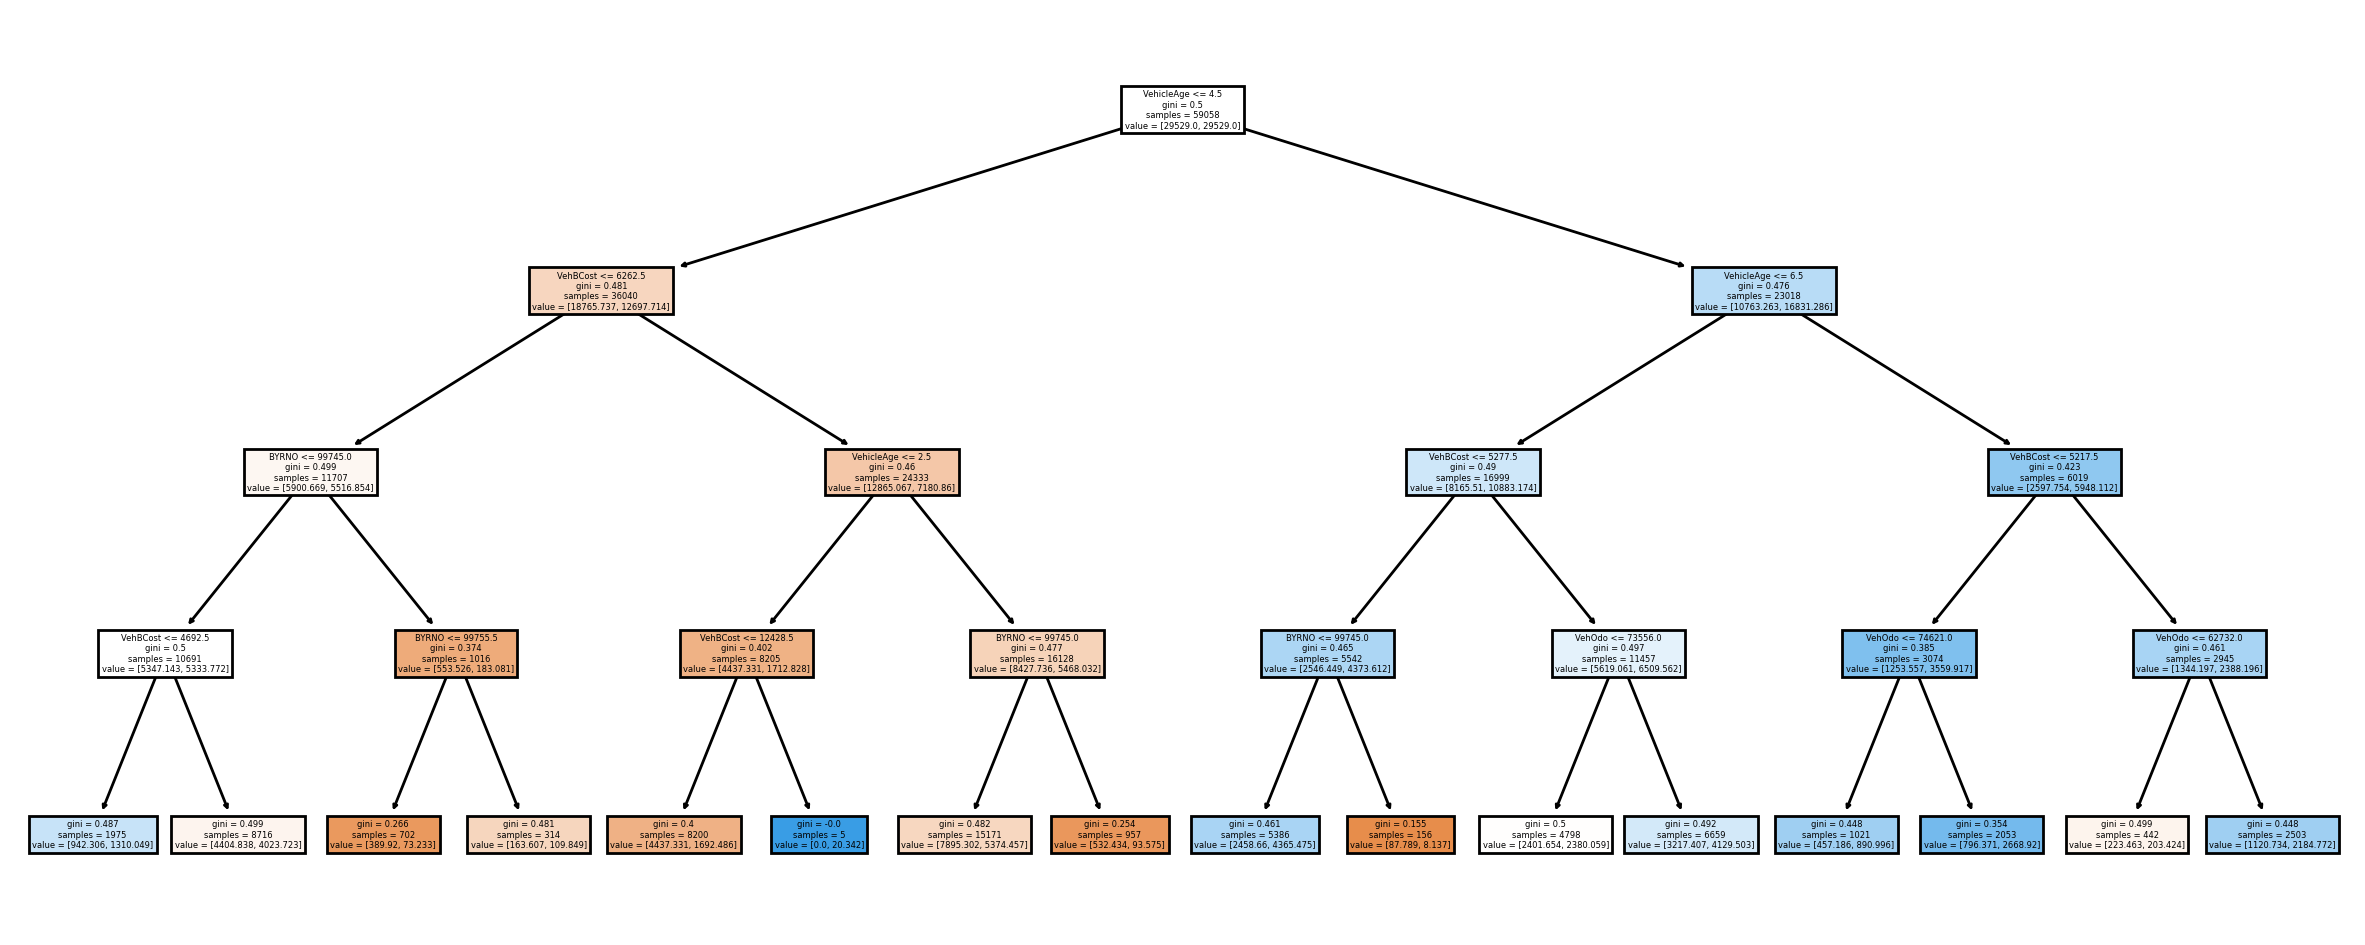

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=[15,6], dpi=200)
plot_tree(model, feature_names=features_train.columns, filled=True);
plt.savefig('tree_base.jpeg')

By checking the metrics, current model shows the best, by using only numeric columns and oversampling.

DecisionTreeClassifier(max_depth=6, random_state=42) 



## Modeling


Now let's get to the core task of a Data Scientist, building machine learning models. As you have already learned in this course, optimizing a model is an iterative process. So you will certainly perform the following steps more than once.


### Build a simple baseline model


Before you now focus on creating and selecting new features, you should first see where to start your efforts and create a first simple model without any hyperparameter optimization. So you can always check afterwards whether the following model optimization steps result in an improvement. The best approach is to create a pipeline that does the modeling as well as encoding the non-numerical features. We suggest using the following steps:

1. Define numerical features (`num_cols`) and categorical features (`cat_cols`).
3. Select the algorithm for the baseline model and instantiate it as `model`.
3. Create pipeline (`model_baseline`) according to the outline below.
4. Use the cleaned and, if necessary, filtered `features_train` and the corresponding `target _train` to *fit*.
5. Make predictions based on `features_test` using `model_baseline`.


<img src="03_05_01_pic1_baselinepipe.png">


In [67]:
# define num_cols and cat_cols
num_cols_selected = ['VehYear', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost']
cat_cols = ['Make', 'PRIMEUNIT', 'AUCGUART', 'TopThreeAmericanName', 'Transmission']

In [41]:
df_results, models = over_under_test(df_train, df_test, num_cols_selected)
display(df_results)

/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


OVERSAMPLING
f1 on Validation set: 0.2735380050117709
precision : 0.19025604551920342
recall : 0.6323877068557919
DecisionTreeClassifier(max_depth=4, random_state=42)
###########
UNDERSAMPLING
f1 on Validation set: 0.2735224911281599
precision : 0.18254913639070874
recall : 0.7245862884160756
DecisionTreeClassifier(max_depth=4, random_state=42)
###########
SMOTE
f1 on Validation set: 0.2645818530729349
precision : 0.17345715997603356
recall : 0.6843971631205674
DecisionTreeClassifier(max_depth=2, random_state=42)
###########
CLASS_WEIGHTS
f1 on Validation set: 0.27334550306724886
precision : 0.2070063694267516
recall : 0.5378250591016549
DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)
###########


,name,precision,recall
0,oversampling,0.19,0.63
1,undersampling,0.18,0.72
2,SMOTE,0.17,0.68
3,class_weights,0.21,0.54


In [42]:
models[1]

DecisionTreeClassifier(max_depth=4, random_state=42)

With selected columns, undersampling works best.

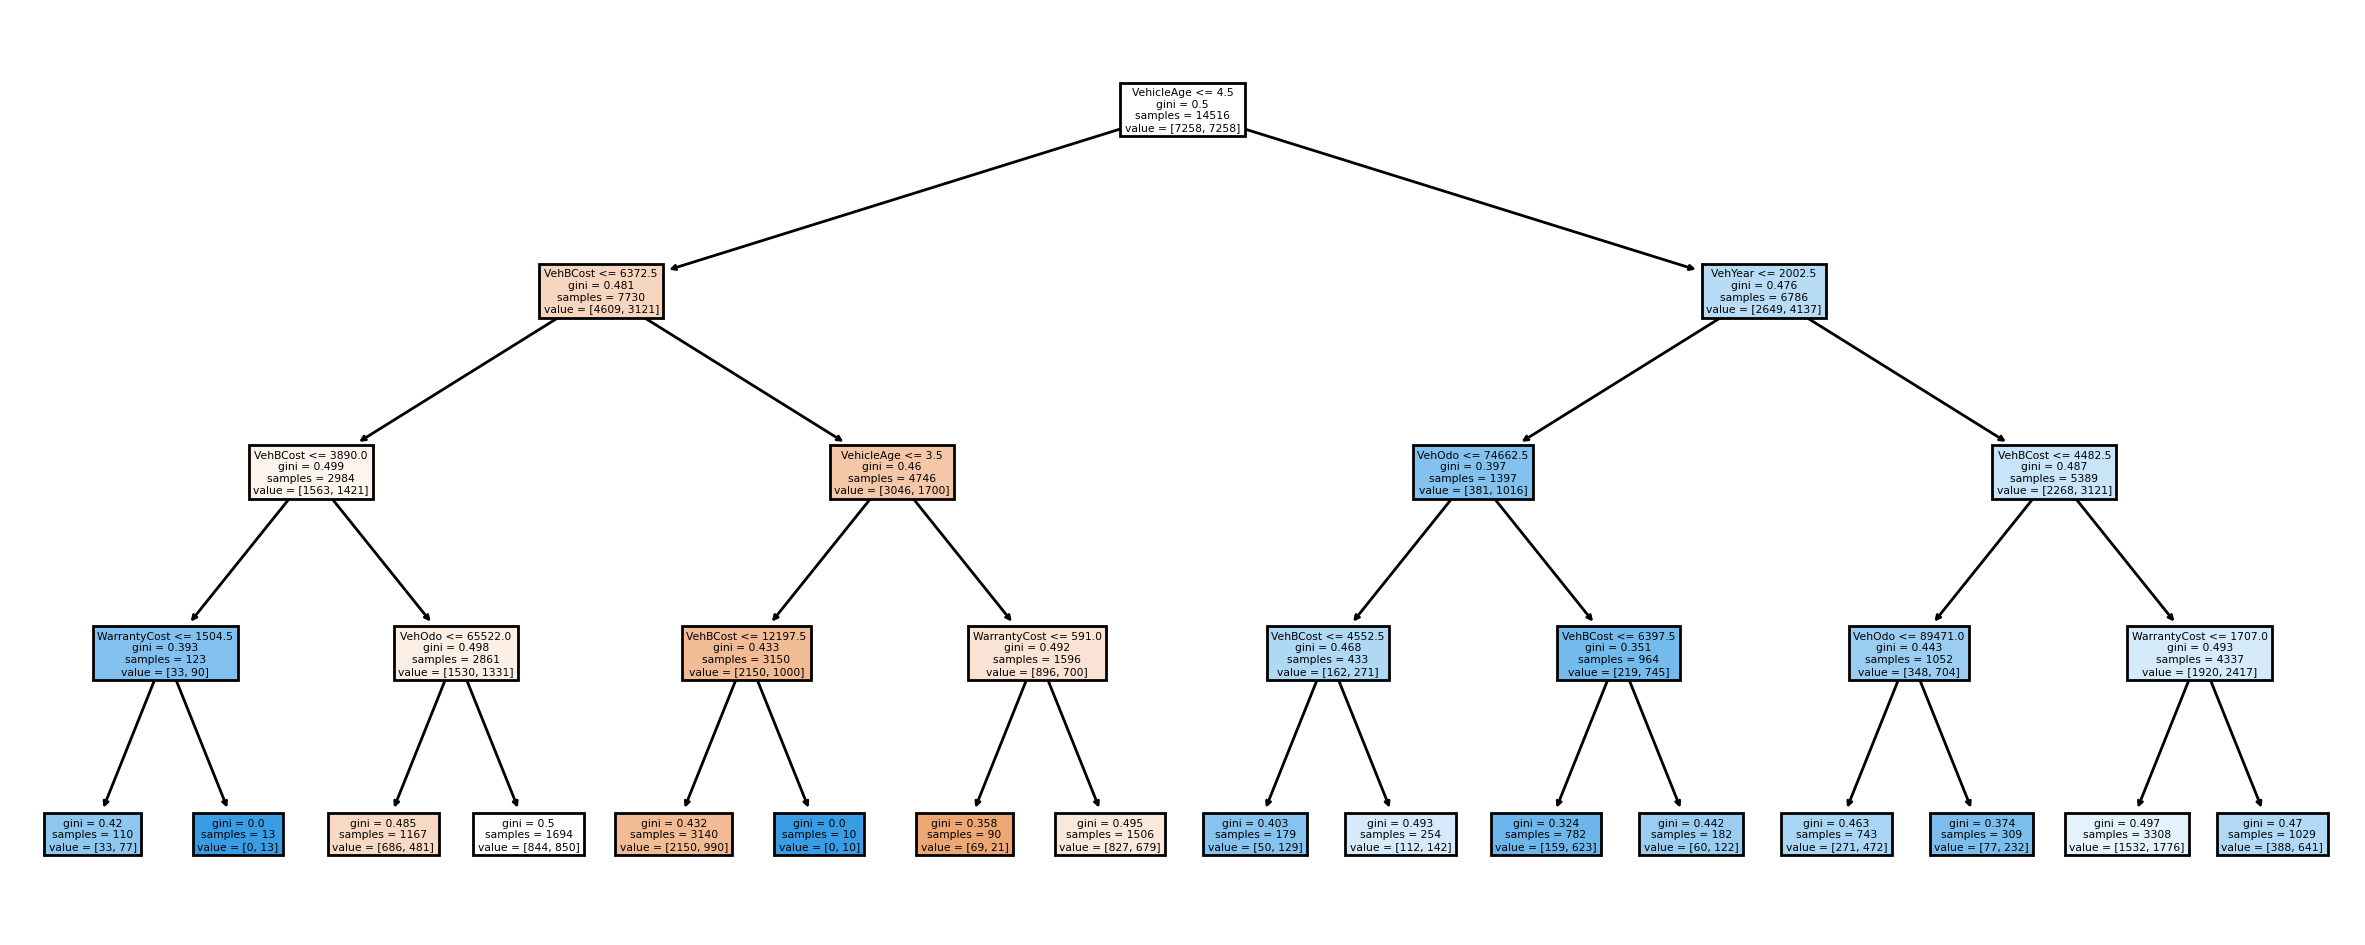

In [44]:
plt.figure(figsize=[15,6], dpi=200)
plot_tree(models[1], feature_names=num_cols_selected, filled=True);
plt.savefig('tree_select_under.jpeg')

**Congratulations**:
You've created a baseline model and can now work on improving the metrics.


### Feature engineering


Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

The data set already offers some features. However, many of them are text-based and therefore not yet usable for most models. When creating new features, keep in mind that the computing time and memory requirements of your models increase with each additional feature. Most car models have a confusingly large number of different versions, sub-models and trim levels. The car dealer's experience to date, however, shows that the influence of the car brand on a cars resell value clearly outweighs the influence of the car model itself.


Now you've created or deleted some new features and modified the training data. In order to be able to do the same with new data sets, you should copy the steps you performed into a function. Call this function `engineer_features`.


In [35]:
def engineer_features(df):

    #Extract Body type from submodel
    def classify_body_type(submodel):
        import re
        patterns = {
            'Sedan': 'SEDAN|STRATUS',
            'Coupe': 'COUPE',
            'SUV': 'SUV|SPORT UTILITY|UTILITY|XUV|CUV|CROSSOVER|JEEP|FREESTAR|HARDTOP',
            'Minivan': 'MINIVAN|MAZDA5',
            'Wagon': 'WAGON',
            'Hatchback': 'HATCHBACK|LIFTBACK|HATCKBACK',
            'Pickup': 'CAB|PICKUP',
            'Passenger': 'PASSENGER',
            'Van': 'VAN',
            'Sport':'SPORT|CONVERTIBLE|SPYDER|ROADSTER'
            }
        for key, pattern in patterns.items():
            if re.search(pattern, submodel, re.IGNORECASE):
                return key
        return 'Other'

    df['BodyType'] = df['SubModel'].apply(classify_body_type)
    
    #Label encode AUCGUART and PRIMEUNIT
    df['AUCGUART'] = df['AUCGUART'].apply(lambda x: 1 if x == 'GREEN' else 0)
    df['PRIMEUNIT'] = df['PRIMEUNIT'].apply(lambda x: 1 if x == 'NO' else 0)
    
    #Create car use by dividing Odometer by Vehicle Age
    
    df['Usage'] = df['VehOdo'] / (df['VehicleAge']+1)
      
    return df

**Congratulations**:
Now with the new features, you have a good basis for a first real model!


In [34]:
df['Usage'] = df['VehOdo'] / (df['VehicleAge']+1)
df['Usage'].describe()

count   65620.00
mean    15185.80
std      5415.66
min       766.86
25%     11374.54
50%     14261.60
75%     17879.12
max     83729.00
Name: Usage, dtype: float64

### Data scaling


Models usually perform better if you scale the data first. The best way to do this is to use the *transformer* from `sklearn.preprocessing`. You can instantiate it here, test it and then add it to your pipeline later.


### Dimensionality reduction


Did you come across any strongly correlated features in your EDA, or just too many features in general? Then we recommend that you check if dimensionality reduction could be helpful, e.g. with a `PCA`. We have covered the procedure for this in *Module 1, Chapter 4*.


### Feature selection


Selecting the right features is a good way to avoid *overfitting* and to improve your model overall. Less is more here.


### Model training


Now it's time to create and evaluate a model.
When creating the model, it can be helpful to ask yourself the following questions:


- Which model should you use? You got to know the following Classification models in this course:
    * `sklearn.neighbors.KNeighborsClassifier` (see *Modul 1, Chapter 2, k Nearest Neighbors*)
    * `sklearn.linear_model.LogisticRegression` (see *Module 2, Chapter 2, Logistic Regression*)
    * `sklearn.tree.DecisionTreeClassifier` (see *Module 2, Chapter 3, Decision Tree*)
    * `sklearn.ensemble.RandomForestClassifier` (see *Module 2, Chapter 3, From Decision Trees to Random Forests with Ensembling*)
    * `sklearn.svm.SVC` (see *Module 2, Chapter 4, Support Vector Machines*)
    * Artificial neural networks with `keras` (see *Module 2, Chapter 5, Introduction to Artificial Neural Networks - Neural Networks*)
- How good are the predictions on unseen data? The following objects can help you with this:
    * `sklearn.pipeline.pipeline` (see *Module 1, Chapter 1, Introduction to Pipelines*)
    * `sklearn.model_selection.KFold` (see *Module 1, Chapter 1, Validating Models with Cross Validation*)
    * `sklearn.model_selection.cross_val_score()` (see *Module 1, Chapter 1, Introduction to Pipelines*)
    * `sklearn.model_selection.validation_curve()` (see *Module 1, Chapter 1, Grid Search*)
    * `sklearn.model_selection.GridSearchCV` (see *Module 1, Chapter 1, Grid Search*)
Which features are important for your model and which ones can you do without?


We recommend that you run the following code cell so that you do not see the data conversion warning.


In [ ]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

To save you some typing, we've already defined an import command. Feel free to add to it:


In [133]:
#useful imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC

In [146]:
def get_train_test():
    
    num_cols_selected = ['VehYear', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost', 'PRIMEUNIT', 'Usage']
    cat_cols = ['Make', 'TopThreeAmericanName', 'Transmission', 'BodyType', 'Nationality', 'WheelType', 'Color']
    
    df_train = df_train_backup.copy()
    df_train = clean_data(df_train)
    df_train = engineer_features(df_train)
    #df_train = df_train[df_train['VehBCost'] < 15000]

    df_test = pd.read_csv('features_test.csv')
    df_test = clean_data(df_test)
    df_test = engineer_features(df_test)

    features_train = df_train[num_cols_selected+cat_cols].copy()
    target_train = df_train.loc[:, 'IsBadBuy'].copy()


    features_test = df_test[num_cols_selected+cat_cols].copy()
    target_test = df_test.loc[:, 'IsBadBuy'].copy()
    return features_train, target_train, features_test, target_test

First build a simple model and evaluate it to have a comparison value.


In [37]:
df.columns

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'Usage'],
      dtype='object')

In [38]:
# build unoptimized model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline as Imbpipe

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier


num_cols_selected = ['VehYear', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost', 'PRIMEUNIT', 'Usage']
cat_cols = ['Make', 'TopThreeAmericanName', 'Transmission', 'BodyType', 'Nationality', 'WheelType', 'Color']

df_train = df_train_backup.copy()
df_train = clean_data(df_train)
df_train = engineer_features(df_train)

df_test = pd.read_csv('features_test.csv')
df_test = clean_data(df_test)
df_test = engineer_features(df_test)


features_train = df_train[num_cols_selected+cat_cols].copy()
target_train = df_train.loc[:, 'IsBadBuy'].copy()


features_test = df_test[num_cols_selected+cat_cols].copy()
target_test = df_test.loc[:, 'IsBadBuy'].copy()

#Undersample
undersampler = RandomUnderSampler(random_state=42)
features_under, target_under = undersampler.fit_resample(features_train, target_train)

#Oversample
oversampler = RandomOverSampler(random_state=42)
features_over, target_over = oversampler.fit_resample(features_train, target_train)


samplers = [('oversampling', oversampler),
            ('undersampling', undersampler),
            ('class_weights', 'passthrough')
           ]


# storage container for results
results = []
models = []

# go through every sampler
for name, sampler in samplers:

    preprocess = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols_selected),
                                                ('cat', OneHotEncoder(), cat_cols) ])

    pipeline = Imbpipe(steps=[('preprocess', preprocess),
                                ('sampling', sampler),
                                ('classifier', DecisionTreeClassifier(random_state=42))
                                ])

    search_space = {'classifier__max_depth': range(2, 24, 2),
                    'classifier__class_weight': [None, 'balanced']
                    }

    # GridSearchCV and cross-validation
    grid = GridSearchCV(estimator=pipeline, 
                    param_grid=search_space,
                    n_jobs=-1,
                    cv=5,
                    scoring='f1')

    grid.fit(features_train, target_train)

    #evaluation
    model = grid.best_estimator_
    recall = recall_score(target_test, model.predict(features_test))
    precision = precision_score(target_test, model.predict(features_test))

    #verbose
    print(name.upper())
    print(grid.scoring, 'on Validation set:', grid.best_score_ )
    print("precision :", precision)
    print("recall :", recall)
    print(model)
    print('#'*11)

    #save
    scores = {'name': name,
          'precision': precision,
          'recall': recall,
         }
    results.append(scores)
    models.append(model)

#show results
print(pd.DataFrame(results))

OVERSAMPLING
f1 on Validation set: 0.27305014304973885
precision : 0.19025604551920342
recall : 0.6323877068557919
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['VehYear', 'VehicleAge',
                                                   'VehOdo', 'VehBCost',
                                                   'WarrantyCost', 'PRIMEUNIT',
                                                   'Usage']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Make',
                                                   'TopThreeAmericanName',
                                                   'Transmission', 'BodyType',
                                                   'Nationality', 'WheelType',
                                                   'Color'])])),
                ('sampling', RandomOverSampler(random_sta

In [47]:
features_train.columns

Index(['VehYear', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost',
       'PRIMEUNIT', 'Usage', 'Make', 'TopThreeAmericanName', 'Transmission',
       'BodyType', 'Nationality', 'WheelType', 'Color'],
      dtype='object')

Then optimize the hyper parameters. Does this improve your predictions?


In [140]:
#Try logistic regression with numerical columns

num_cols_selected = ['VehYear', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost', 'Usage', 'PRIMEUNIT']
cat_cols = ['Make', 'Transmission', 'BodyType', 'Nationality', 'WheelType']

df_train = df_train_backup.copy()
df_train = clean_data(df_train)
df_train = engineer_features(df_train)
df_train = df_train[df_train['VehBCost']]

df_test = pd.read_csv('features_test.csv')
df_test = clean_data(df_test)
df_test = engineer_features(df_test)


features_train = df_train[num_cols_selected+cat_cols].copy()
target_train = df_train.loc[:, 'IsBadBuy'].copy()


features_test = df_test[num_cols_selected+cat_cols].copy()
target_test = df_test.loc[:, 'IsBadBuy'].copy()

#Undersample
undersampler = RandomUnderSampler(random_state=42)
features_under, target_under = undersampler.fit_resample(features_train, target_train)

#Oversample
oversampler = RandomOverSampler(random_state=42)
features_over, target_over = oversampler.fit_resample(features_train, target_train)


#Model
preprocess_logistic = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols_selected),
                                                      ('cat', OneHotEncoder(), cat_cols)
                                                     ])

pipeline_logistic = Imbpipe(steps=[('preprocess', preprocess_logistic),
                            ('classifier', LogisticRegression(max_iter=1000))
                            ])

                                        

search_space_log = {'classifier__fit_intercept': [True, False],
                'classifier__class_weight': [None, 'balanced'],
                'classifier__solver': ['liblinear', 'newton-cg', 'sag', 'saga']
                }                                        
                                        
# GridSearchCV and cross-validation
grid_logistic = GridSearchCV(estimator=pipeline_logistic, 
                param_grid=search_space_log,
                n_jobs=-1,
                cv=3,
                scoring='f1')

#Evaluation no sampling
grid_logistic.fit(features_train, target_train)
model_logistic = grid_logistic.best_estimator_
recall_log = recall_score(target_test, model_logistic.predict(features_test))
precision_log = precision_score(target_test, model_logistic.predict(features_test))

#verbose
print('No sampling')
print(grid_logistic.scoring, 'on Validation set:', grid_logistic.best_score_ )
print("precision :", precision_log)
print("recall :", recall_log)
print(model_logistic)
print('-'*15)



#evaluation under
grid_logistic.fit(features_under, target_under)
model_logistic = grid_logistic.best_estimator_
recall_log = recall_score(target_test, model_logistic.predict(features_test))
precision_log = precision_score(target_test, model_logistic.predict(features_test))

#verbose
print('Undersampling')
print(grid_logistic.scoring, 'on Validation set:', grid_logistic.best_score_ )
print("precision :", precision_log)
print("recall :", recall_log)
print(model_logistic)
print('-'*15)



#evaluation over
grid_logistic.fit(features_over, target_over)
model_logistic = grid_logistic.best_estimator_
recall_log = recall_score(target_test, model_logistic.predict(features_test))
precision_log = precision_score(target_test, model_logistic.predict(features_test))

#verbose
print('Oversampling')
print(grid_logistic.scoring, 'on Validation set:', grid_logistic.best_score_ )
print("precision :", precision_log)
print("recall :", recall_log)
print(model_logistic)
print('-'*15)


No sampling
f1 on Validation set: 0.28422754774987413
precision : 0.2018106374952848
recall : 0.6323877068557919
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['VehYear', 'VehicleAge',
                                                   'VehOdo', 'VehBCost',
                                                   'WarrantyCost', 'Usage',
                                                   'PRIMEUNIT']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Make', 'Transmission',
                                                   'BodyType', 'Nationality',
                                                   'WheelType'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])
---------------


/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/jovyan/.virtualenvs/training_env/lib/python3.8/sit

Undersampling
f1 on Validation set: 0.6112516654591964
precision : 0.20149812734082398
recall : 0.6359338061465721
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['VehYear', 'VehicleAge',
                                                   'VehOdo', 'VehBCost',
                                                   'WarrantyCost', 'Usage',
                                                   'PRIMEUNIT']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Make', 'Transmission',
                                                   'BodyType', 'Nationality',
                                                   'WheelType'])])),
                ('classifier',
                 LogisticRegression(fit_intercept=False, max_iter=1000,
                                    solver='newton-cg'))])
---------------
Oversampling
f

In [149]:
#Try SVC Classification

features_train, target_train, features_test, target_test = get_train_test()

search_space = {'estimator__max_depth': range(2, 16, 2),
                'estimator__class_weight': [None, 'balanced']}

#Undersample
#undersampler = RandomUnderSampler(random_state=42)
#features_under, target_under = undersampler.fit_resample(features_train, target_train)
 

    
preprocess_svc = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols_selected),
                                            ('cat', OneHotEncoder(), cat_cols)
                                            ])

svc_pipeline = Imbpipe(steps=[('preprocess', preprocess_svc),
                            ('classifier', LinearSVC(random_state=42, max_iter=5000))
                            ])

search_space_svc = {'classifier__C':[0.01, 0.1, 1],
                'classifier__class_weight':[None, 'balanced']
                }

# GridSearchCV and cross-validation
grid_svc = GridSearchCV(estimator=svc_pipeline, 
                param_grid=search_space_svc,
                n_jobs=-1,
                cv=4,
                scoring='f1')

grid_svc.fit(features_train, target_train)

#evaluation
model_svc = grid_svc.best_estimator_
recall = recall_score(target_test, model_svc.predict(features_test))
precision = precision_score(target_test, model_svc.predict(features_test))

#verbose
print('Linear SVC')
print(grid_svc.scoring, 'on Validation set:', grid_svc.best_score_ )
print("precision :", precision)
print("recall :", recall)
print(model_svc)
print('-'*21)

#save
scores_svc = {'name': name,
      'precision': precision,
      'recall': recall,
     }
results_svc = scores_svc
models_scv = model_svc

#show results
print(results_svc)

Linear SVC undersampled
f1 on Validation set: 0.2838104867234016
precision : 0.20014992503748125
recall : 0.6312056737588653
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['VehYear', 'VehicleAge',
                                                   'VehOdo', 'VehBCost',
                                                   'WarrantyCost', 'Usage',
                                                   'PRIMEUNIT']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Make', 'Transmission',
                                                   'BodyType', 'Nationality',
                                                   'WheelType'])])),
                ('classifier',
                 LinearSVC(C=0.01, class_weight='balanced', max_iter=5000,
                           random_state=42))])
---------------------
{'name'

In [151]:
# Ensemble
features_train, target_train, features_test, target_test = get_train_test()

#Oversample
oversampler = RandomOverSampler(random_state=42)
features_over, target_over = oversampler.fit_resample(features_train, target_train)

#Undersample
undersampler = RandomUnderSampler(random_state=42)
features_under, target_under = undersampler.fit_resample(features_train, target_train)

pipe_tree = Pipeline(steps=[('preprocess', ColumnTransformer(transformers=[('num', StandardScaler(),
                                                                              ['VehYear', 'VehicleAge',
                                                                               'VehOdo', 'VehBCost',
                                                                               'WarrantyCost', 'PRIMEUNIT',
                                                                               'Usage']),
                                                                         ('cat', OneHotEncoder(),
                                                                              ['Make', 'Transmission',
                                                                               'BodyType', 'Nationality',
                                                                               'WheelType'])])),
                            ('classifier', RandomForestClassifier(n_estimators=200, max_depth=4, random_state=42))])

pipe_logistics = Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['VehYear', 'VehicleAge',
                                                   'VehOdo', 'VehBCost',
                                                   'WarrantyCost', 'Usage',
                                                   'PRIMEUNIT']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Make', 'Transmission',
                                                   'BodyType', 'Nationality',
                                                   'WheelType'])])),
                ('classifier', LogisticRegression(fit_intercept=False, max_iter=1000, solver='newton-cg'))])

pipe_svc = Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['VehYear', 'VehicleAge',
                                                   'VehOdo', 'VehBCost',
                                                   'WarrantyCost', 'Usage',
                                                   'PRIMEUNIT']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Make', 'Transmission',
                                                   'BodyType', 'Nationality',
                                                   'WheelType'])])),
                ('classifier',LinearSVC(C=0.01, class_weight='balanced', max_iter=5000, random_state=42))])

pipe_tree.fit(features_over, target_over)
pipe_logistics.fit(features_over, target_over)
pipe_svc.fit(features_train, target_train)

tree_pred = pipe_tree.predict(features_test)
logistics_pred = pipe_logistics.predict(features_test)
svc_pred = pipe_svc.predict(features_test)


In [154]:
#Create a weighted average calculation to determine weights from the model predictions into a final prediction

import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score
from itertools import product

tree_pred = pipe_tree.predict(features_test)
logistics_pred = pipe_logistics.predict(features_test)
svc_pred = pipe_svc.predict(features_test)

# Combine predictions with weighted average
def weighted_average(preds, weights):
    combined_pred = np.average(preds, axis=0, weights=weights)
    return np.round(combined_pred).astype(int)

# Define the weights to try
weights_list = list(product(np.linspace(0, 1, 11), repeat=3))
weights_list = [weights for weights in weights_list if sum(weights) == 1]

# Initialize variables to store the best results
best_f1 = 0
best_weights = None

# Iterate over each set of weights
for weights in weights_list:
    combined_pred = weighted_average(np.array([tree_pred, logistics_pred, svc_pred]), weights)

    f1 = f1_score(target_test, combined_pred)
    precision = precision_score(target_test, combined_pred)
    recall = recall_score(target_test, combined_pred)

    if f1 > best_f1:
        best_f1 = f1
        best_weights = weights

# Output the best results
print(f"Best weights: {best_weights}")
print(f"Best F1-score: {best_f1}")

# Use the best weights to get final combined predictions
final_pred = weighted_average(np.array([tree_pred, logistics_pred, svc_pred]), best_weights)
final_precision = precision_score(target_test, final_pred)
final_recall = recall_score(target_test, final_pred)

# Print final evaluation
print(f"Precision: {final_precision}")
print(f"Recall: {final_recall}")

Best weights: (0.0, 0.6000000000000001, 0.4)
Best F1-score: 0.30843510366373184
Precision: 0.20299065420560747
Recall: 0.6418439716312057


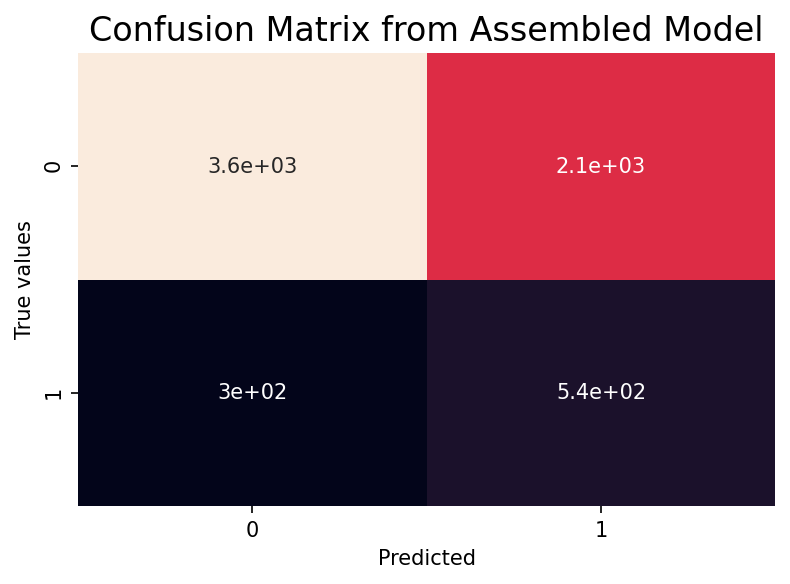

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=150)
con_matrix = confusion_matrix(target_test, final_pred)
sns.heatmap(con_matrix, annot=True, cbar=False);
plt.xlabel('Predicted')
plt.ylabel('True values')
plt.title('Confusion Matrix from Assembled Model', fontsize=16);

### Model selection


Select the best model. Decide for yourself which metric is most important to you. With `confusion_matrix()` from `sklearn.metrics` you can see exactly how many data points were classified correctly and incorrectly. Maybe this will help you decide.


In [ ]:
# select model


**Congratulations**:
You have built and saved your final model. Now you can combine all the steps in one function to determine the prediction quality on the test data set.


## The final data pipeline

You've cleaned and prepared the data and then trained a model on it. Now combine the respective steps in a function or pipeline that reads a data set and generates predictions for it. Don't delete data points from the test data. This could distort the model's estimated prediction quality.


**Congratulations**:
You now have a function that imports the data for you, prepares it and makes predictions directly. This will be very helpful for the buyers.


## Model Interpretation


In order to make your model more appealing to the company's buyers, you should be able to explain to them which features are important for the model.

According to your model, which features are most important for the predictions?


How does your average prediction change when you vary the mileage `'VehOdo'` or the age `'VehicleAge'`. Is that what you'd expect?


## Completing the project


The file *features_aim.csv* contains the features for your final prediction.
Save just your predicted values for `'IsBadBuy'` in a CSV file called 
`predictions_aim.csv`. According to your model, how many purchases in the target data should be avoided?


**Congratulations**:
You've completed another independent data science project! This means you're well equipped to implement projects independently and as part of a team!


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
